<center><img src =  ></center>

# **<center><font color='black'>K.J Somaiya College of Engineering</font></center>**

## <center><font color='red'>Engineering Final Year Project</font></center>

## <center>**<font color='purple'>InsureBuddy - An Insurance Recommender System</font></center>**


### **Author:**
### **Sujay Torvi**
### Co-Authors:
### 1. Krupen Shah
### 2. Harsh Somaiya
### 3. Tirth Desai

### Copyright© 2020 Under MIT License 

## **<font color='purple'>`Problem Statement: To process, analyse and mine the data for useful insights in insurance product recommendation and model them using various algorithms, and deploying them into an application which would provide the user with useful insurance product recommendations`</font>**

## **V. Model Analysis** 

## **Source of Dataset:**
### **Zimnnat Insurance Recommendation Dataset**

URL: https://zindi.africa/competitions/zimnat-insurance-recommendation-challenge

<br>

**<font color='red'>Important:</font>**

**<font color='purple'>Since no metadata is given for this dataset we are free to remove and impute our own attributes</font>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from google.colab import files
u = files.upload()

Saving Training_Data_rebalanced.xlsx to Training_Data_rebalanced.xlsx


In [4]:
import zipfile

In [5]:
with zipfile.ZipFile('/content/bayesian_nn.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/bayesian_nn')

In [6]:
from tensorflow import keras
model = keras.models.load_model('/content/bayesian_nn')

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_tfp_1 (DenseFlipout)   (None, 24)                264       
_________________________________________________________________
dense_tfp_2 (DenseFlipout)   (None, 12)                588       
_________________________________________________________________
dense_tfp_3 (DenseFlipout)   (None, 6)                 150       
_________________________________________________________________
out_tfp_pred (DenseFlipout)  (None, 5)                 65        
Total params: 1,067
Trainable params: 1,067
Non-trainable params: 0
_________________________________________________________________


In [13]:
import pickle

In [14]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 4.3MB/s 


In [15]:
import skmultilearn

In [16]:
clf = pickle.load(open('/content/RFClassifier.sav', 'rb'))

In [19]:
train = pd.read_excel('Training_Data_rebalanced.xlsx')

In [20]:
train.head()

,Unnamed: 0,sex,marital_status,age_group,occupation_category_code,Annual_Income,Policy 1,Policy 2,Policy 3,Policy 4,Policy 5
0,0,0,0,0,0,1,1,1,0,0,0
1,1,0,0,0,0,1,1,1,0,0,0
2,2,1,1,0,4,1,1,0,0,0,0
3,3,1,0,0,2,1,1,1,0,0,0
4,4,1,0,0,0,1,0,0,0,1,1


In [22]:
train.sex.unique()

array([0, 1])

In [23]:
train.marital_status.unique()

array([0, 1])

In [24]:
train.age_group.unique()

array([0, 1, 2, 3])

In [25]:
train.occupation_category_code.unique()

array([0, 4, 2, 3, 1])

In [26]:
train.Annual_Income.unique()

array([1, 5, 2, 0, 3, 4])

### So there can be 2 * 2 * 4 * 5 * 6 = 480 unique inputs given to the model

In [36]:
list_1 = []
list_2 = []

In [37]:
for i in range(0,2):
  for j in range(0,2):
    for k in range(0,4):
      for l in range(0,5):
        for m in range(0,6):
          list_1 = [i,j,k,l,m]
          list_2.append(list_1)

In [39]:
test_arr = np.array(list_2) 

In [155]:
p1 = []
p2 = []
p3 = []
p4 = []
p5 = []

In [156]:
y_pred = clf.predict(test_arr)

In [157]:
for i in range(0,480):
  y_pred_ = y_pred.toarray()
  if(y_pred_[i][0] == 1):
    p1.append(list_2[i])
  if(y_pred_[i][1] == 1):
    p2.append(list_2[i])
  if(y_pred_[i][2] == 1):
    p3.append(list_2[i])
  if(y_pred_[i][3] == 1):
    p4.append(list_2[i])
  if(y_pred_[i][4] == 1):
    p5.append(list_2[i])

In [158]:
p1,p2,p3,p4,p5 = pd.DataFrame(p1),pd.DataFrame(p2),pd.DataFrame(p3),pd.DataFrame(p4),pd.DataFrame(p5)

In [159]:
col = ['sex', 'marital_status', 'age_group',\
       'occupation_category_code', 'Annual_Income']

In [160]:
def rename_cols(df,col):
  df.columns = col

In [161]:
rename_cols(p1,col)
rename_cols(p2,col)
rename_cols(p3,col)
rename_cols(p4,col)
rename_cols(p5,col)

In [162]:
def apply_1(x):
  if(x == 0):
    return 'Female'
  else:
    return 'Male'

def apply_2(x):
  if(x == 0):
    return 'Married'
  else:
    return 'Single'

def apply_3(x):
  if(x == 0):
    return '25-40'
  elif(x == 1):
    return '41-60'
  elif(x == 2):
    return 'Above 60'
  elif(x == 3):
    return 'Below 25'

def apply_4(x):
  if(x == 0):
    return 'Corporate Employee'
  elif(x == 1):
    return 'Enterpreneur'
  elif(x == 2):
    return 'Medical Professional'
  elif(x == 3):
    return 'Military Service'
  elif(x == 4):
    return 'Self Employed'

def apply_5(x):
  if(x == 0):
    return '0-5 lac'
  elif(x == 1):
    return '10-20 lac'
  elif(x == 2):
    return '20-30 lac'
  elif(x == 3):
    return '30-40 lac'
  elif(x == 4):
    return '40-50 lac'
  elif(x == 5):
    return '5-10 lac'

In [163]:
def my_apply(df):
  df.sex = df.sex.apply(apply_1)
  df.marital_status = df.marital_status.apply(apply_2)
  df.age_group = df.age_group.apply(apply_3)
  df.occupation_category_code = df.occupation_category_code.apply(apply_4)
  df.Annual_Income = df.Annual_Income.apply(apply_5)

In [164]:
my_apply(p1)
my_apply(p2)
my_apply(p3)
my_apply(p4)
my_apply(p5)

In [134]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [183]:
def policy_plot(df,policyname):
  print('Plotting for {}'.format(policyname))
  df.sex.value_counts().plot.bar(color = ['red','purple'])
  plt.title('Gender count distribution for {}'.format(policyname))
  plt.show()
  df.marital_status.value_counts().plot.bar(color = ['orange','green'])
  plt.title('Maritial Status count distribution for {}'.format(policyname))
  plt.show()
  df.age_group.value_counts().plot.bar(color = ['red','maroon','gray','orange'])
  plt.title('Age group count distribution for {}'.format(policyname))
  plt.show()
  df.occupation_category_code.value_counts().plot.bar(color = ['blue','red','green','orange','yellow'])
  plt.title('Occupation Category count distribution for {}'.format(policyname))
  plt.show()
  df.Annual_Income.value_counts().plot.bar(color = ['gray','yellow','green','red','maroon','pink'])
  plt.title('Income Range count distribution for {}'.format(policyname))
  plt.show()

Plotting for Policy 1


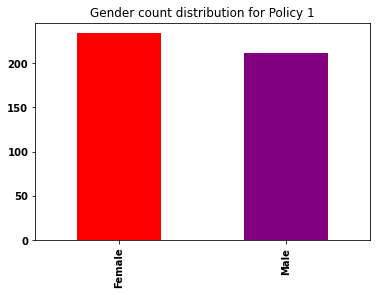

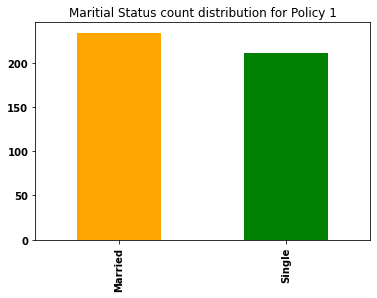

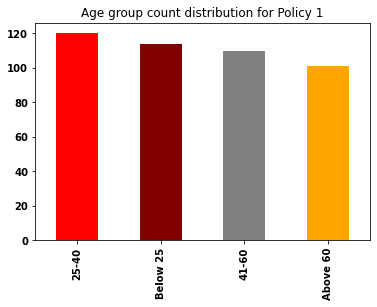

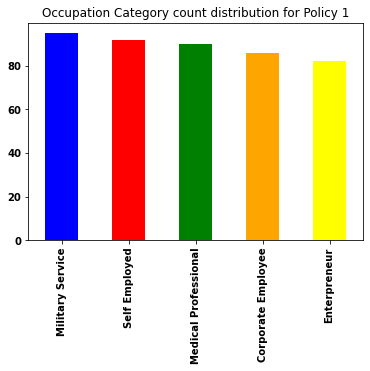

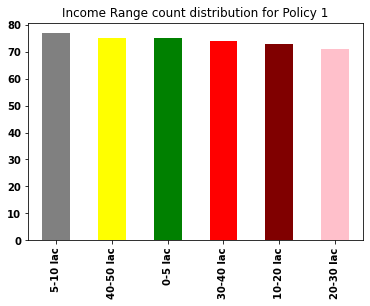

In [184]:
policy_plot(p1,'Policy 1')

Plotting for Policy 2


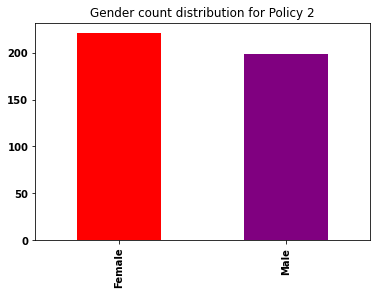

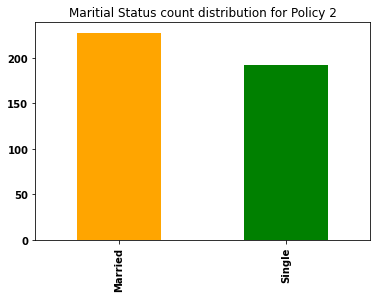

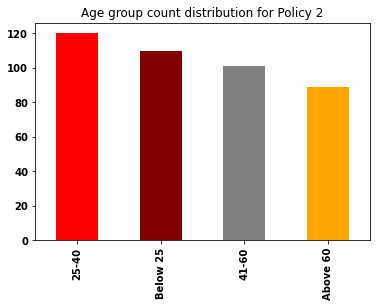

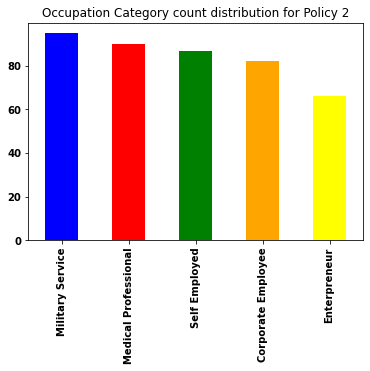

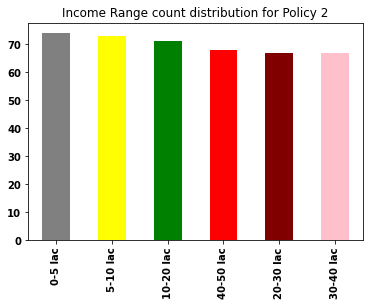

In [185]:
policy_plot(p2,'Policy 2')

Plotting for Policy 3


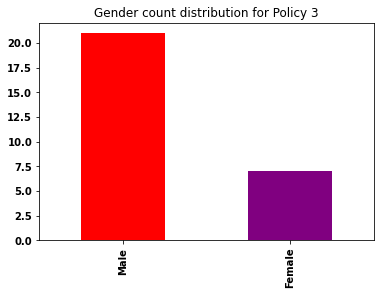

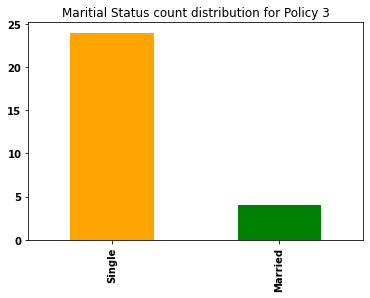

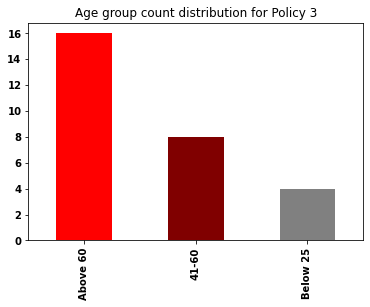

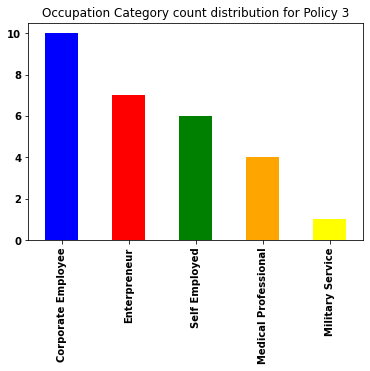

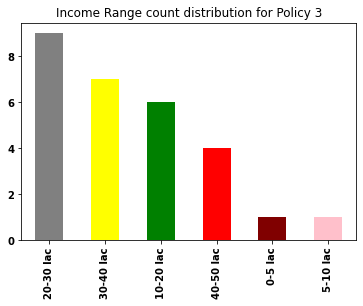

In [186]:
policy_plot(p3,'Policy 3')

Plotting for Policy 4


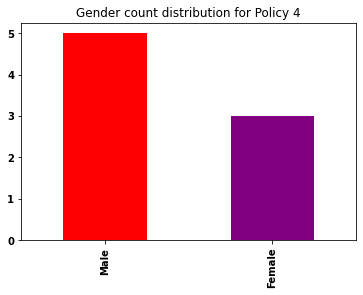

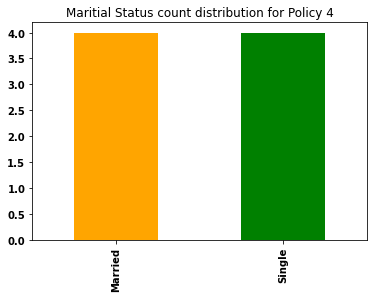

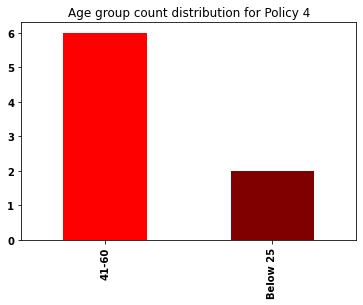

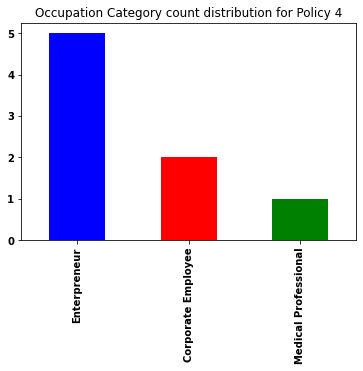

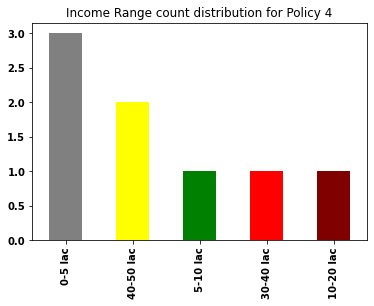

In [187]:
policy_plot(p4,'Policy 4')

Plotting for Policy 5


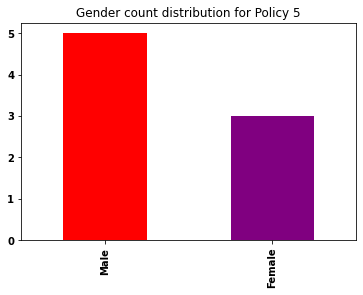

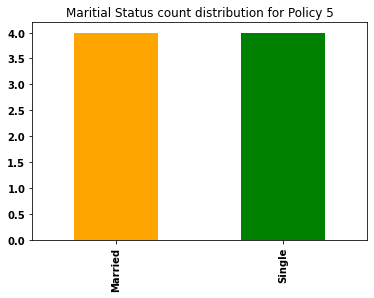

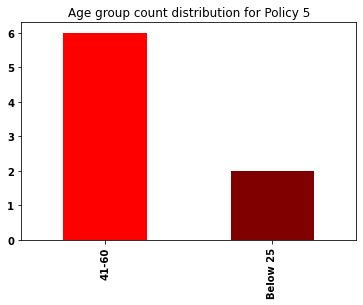

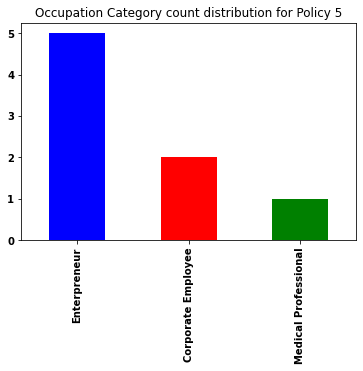

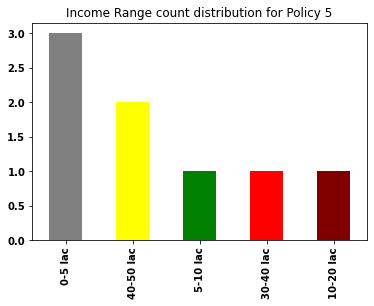

In [188]:
policy_plot(p5,'Policy 5')

## **Patterns that can be inferred from the above predictions**

### 1. Policy 1 and 2 is recommended to most type of users, this pattern was picked up by the model from the data, however policy 1 and 2 could be suitable for more younger generation of users, females who are married.

### 2. Policy 3 tends towards male users, who are single and who are in their middle(41-60) or old age(60+). This policy is also recommended to users in their good income bracket(10 lakhs +)

### 3. Policy 4 also tends towards male users but recommends policy equally to those who are single and who are married. This policy recommends **only** to middle age people i.e 41-60 and young (< 25 years age) users. Recommendation is for enterpreneurial persons and very high income ones(30-50 lakhs), and startup enterpreneurs(0-5 lakhs)

### 4. Policy 5 has similar characteristics to Policy 4